查看pipelines支持的任务类型

In [1]:
from transformers.pipelines import SUPPORTED_TASKS



In [3]:
for k,v in SUPPORTED_TASKS.items():
    print(k,v['type'])

audio-classification audio
automatic-speech-recognition multimodal
text-to-audio text
feature-extraction multimodal
text-classification text
token-classification text
question-answering text
table-question-answering text
visual-question-answering multimodal
document-question-answering multimodal
fill-mask text
summarization text
translation text
text2text-generation text
text-generation text
zero-shot-classification text
zero-shot-image-classification multimodal
zero-shot-audio-classification multimodal
conversational text
image-classification image
image-feature-extraction image
image-segmentation multimodal
image-to-text multimodal
object-detection multimodal
zero-shot-object-detection multimodal
depth-estimation image
video-classification video
mask-generation multimodal
image-to-image image


pipelines的创建和使用

In [1]:
from transformers import *

D:\Environment\Python\python3.10\Lib\site-packages\transformers\deepspeed.py:23: FutureWarning: transformers.deepspeed module is deprecated and will be removed in a future version. Please import deepspeed modules directly from transformers.integrations
  warnings.warn(


根据任务类型直接创建pipeline，默认都是英文的模型

In [3]:
import os
os.environ['HF_ENDPOINT'] = 'https://hf-mirror.com'

pipe=pipeline("text-classification")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://hf-mirror.com/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
loading configuration file config.json from cache at D:\LLM\Huggingface\models--distilbert--distilbert-base-uncased-finetuned-sst-2-english\snapshots\714eb0fa89d2f80546fda750413ed43d93601a13\config.json
Model config DistilBertConfig {
  "_name_or_path": "distilbert/distilbert-base-uncased-finetuned-sst-2-english",
  "activation": "gelu",
  "architectures": [
    "DistilBertForSequenceClassification"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "finetuning_task": "sst-2",
  "hidden_dim": 3072,
  "id2label": {
    "0": "NEGATIVE",
    "1": "POSITIVE"
  },
  "initializer_range": 0.02,
  "label2id": {
    "NEGATIVE": 0,
    "POSITIVE": 1
  },
  "max_position_embeddings": 512,
 

In [4]:
pipe('wery good!')

[{'label': 'POSITIVE', 'score': 0.9998643398284912}]

指定任务类型，再指定任务模型，创建基于指定任务类型和任务模型的任务。

In [6]:
pipe=pipeline("text-classification",model="uer/roberta-base-finetuned-dianping-chinese")

loading configuration file config.json from cache at D:\LLM\Huggingface\models--uer--roberta-base-finetuned-dianping-chinese\snapshots\25faf1874b21e76db31ea9c396ccf2a0322e0071\config.json
Model config BertConfig {
  "_name_or_path": "uer/roberta-base-finetuned-dianping-chinese",
  "architectures": [
    "BertForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "negative (stars 1, 2 and 3)",
    "1": "positive (stars 4 and 5)"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "negative (stars 1, 2 and 3)": 0,
    "positive (stars 4 and 5)": 1
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.41.2",
  "type_vocab_size": 2,
  

In [7]:
pipe('我感觉不太好！')

[{'label': 'negative (stars 1, 2 and 3)', 'score': 0.9626901149749756}]

先加载预训练模型，再创建pipeline。

In [9]:
model=AutoModelForSequenceClassification.from_pretrained("uer/roberta-base-finetuned-dianping-chinese")
tokenizer=AutoTokenizer.from_pretrained("uer/roberta-base-finetuned-dianping-chinese")
pipe=pipeline("text-classification",model=model,tokenizer=tokenizer)

loading configuration file config.json from cache at D:\LLM\Huggingface\models--uer--roberta-base-finetuned-dianping-chinese\snapshots\25faf1874b21e76db31ea9c396ccf2a0322e0071\config.json
Model config BertConfig {
  "_name_or_path": "uer/roberta-base-finetuned-dianping-chinese",
  "architectures": [
    "BertForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "negative (stars 1, 2 and 3)",
    "1": "positive (stars 4 and 5)"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "negative (stars 1, 2 and 3)": 0,
    "positive (stars 4 and 5)": 1
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.41.2",
  "type_vocab_size": 2,
  

In [10]:
pipe('我感觉不太好！')

[{'label': 'negative (stars 1, 2 and 3)', 'score': 0.9626901149749756}]

In [11]:
pipe.model.device

device(type='cpu')

In [12]:
import torch
import time
times=[]
for i in range(100):
    torch.cuda.synchronize()
    start=time.time()
    pipe('我感觉不太行')
    torch.cuda.synchronize()
    end=time.time()
    times.append(end-start)
print(sum(times)/100)

0.01863014221191406


使用gpu进行推理

In [13]:
pipe=pipeline("text-classification",model="uer/roberta-base-finetuned-dianping-chinese",device=0)

loading configuration file config.json from cache at D:\LLM\Huggingface\models--uer--roberta-base-finetuned-dianping-chinese\snapshots\25faf1874b21e76db31ea9c396ccf2a0322e0071\config.json
Model config BertConfig {
  "_name_or_path": "uer/roberta-base-finetuned-dianping-chinese",
  "architectures": [
    "BertForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "negative (stars 1, 2 and 3)",
    "1": "positive (stars 4 and 5)"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "negative (stars 1, 2 and 3)": 0,
    "positive (stars 4 and 5)": 1
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.41.2",
  "type_vocab_size": 2,
  

In [14]:
pipe.model.device

device(type='cuda', index=0)

确定pipeline参数

In [16]:
qa_pipe=pipeline("question-answering",model="uer/roberta-base-chinese-extractive-qa")

loading configuration file config.json from cache at D:\LLM\Huggingface\models--uer--roberta-base-chinese-extractive-qa\snapshots\9b02143727b9c4655d18b43a69fc39d5eb3ddd53\config.json
Model config BertConfig {
  "_name_or_path": "uer/roberta-base-chinese-extractive-qa",
  "architectures": [
    "BertForQuestionAnswering"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.41.2",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 21128
}

loading configuration file config.json from cache at D:\LLM\Huggingface\models--uer--roberta-base-chinese-extractive-qa\snapsh

In [17]:
qa_pipe

In [26]:
QuestionAnsweringPipeline

transformers.pipelines.question_answering.QuestionAnsweringPipeline

In [30]:
qa_pipe(question="中国的首都是哪里?", context="中国的首都是北京",max_answer_len=1)

{'score': 0.002671005204319954, 'start': 6, 'end': 7, 'answer': '北'}

其他pipeline示例

In [33]:
checkpoint="google/owlvit-base-patch32"
detector=pipeline(model=checkpoint,task="zero-shot-object-detection")

loading configuration file config.json from cache at D:\LLM\Huggingface\models--google--owlvit-base-patch32\snapshots\cbc355fb364588351c5d51c7f74465e8e7ec6f72\config.json
text_config is None. Initializing the OwlViTTextConfig with default values.
vision_config is None. initializing the OwlViTVisionConfig with default values.
Model config OwlViTConfig {
  "_name_or_path": "google/owlvit-base-patch32",
  "architectures": [
    "OwlViTForObjectDetection"
  ],
  "initializer_factor": 1.0,
  "logit_scale_init_value": 2.6592,
  "model_type": "owlvit",
  "projection_dim": 512,
  "text_config": {
    "bos_token_id": 0,
    "dropout": 0.0,
    "eos_token_id": 2,
    "max_length": 16,
    "model_type": "owlvit_text_model",
    "pad_token_id": 1
  },
  "text_config_dict": null,
  "torch_dtype": "float32",
  "transformers_version": "4.41.2",
  "vision_config": {
    "dropout": 0.0,
    "model_type": "owlvit_vision_model"
  },
  "vision_config_dict": null
}

loading configuration file config.json f

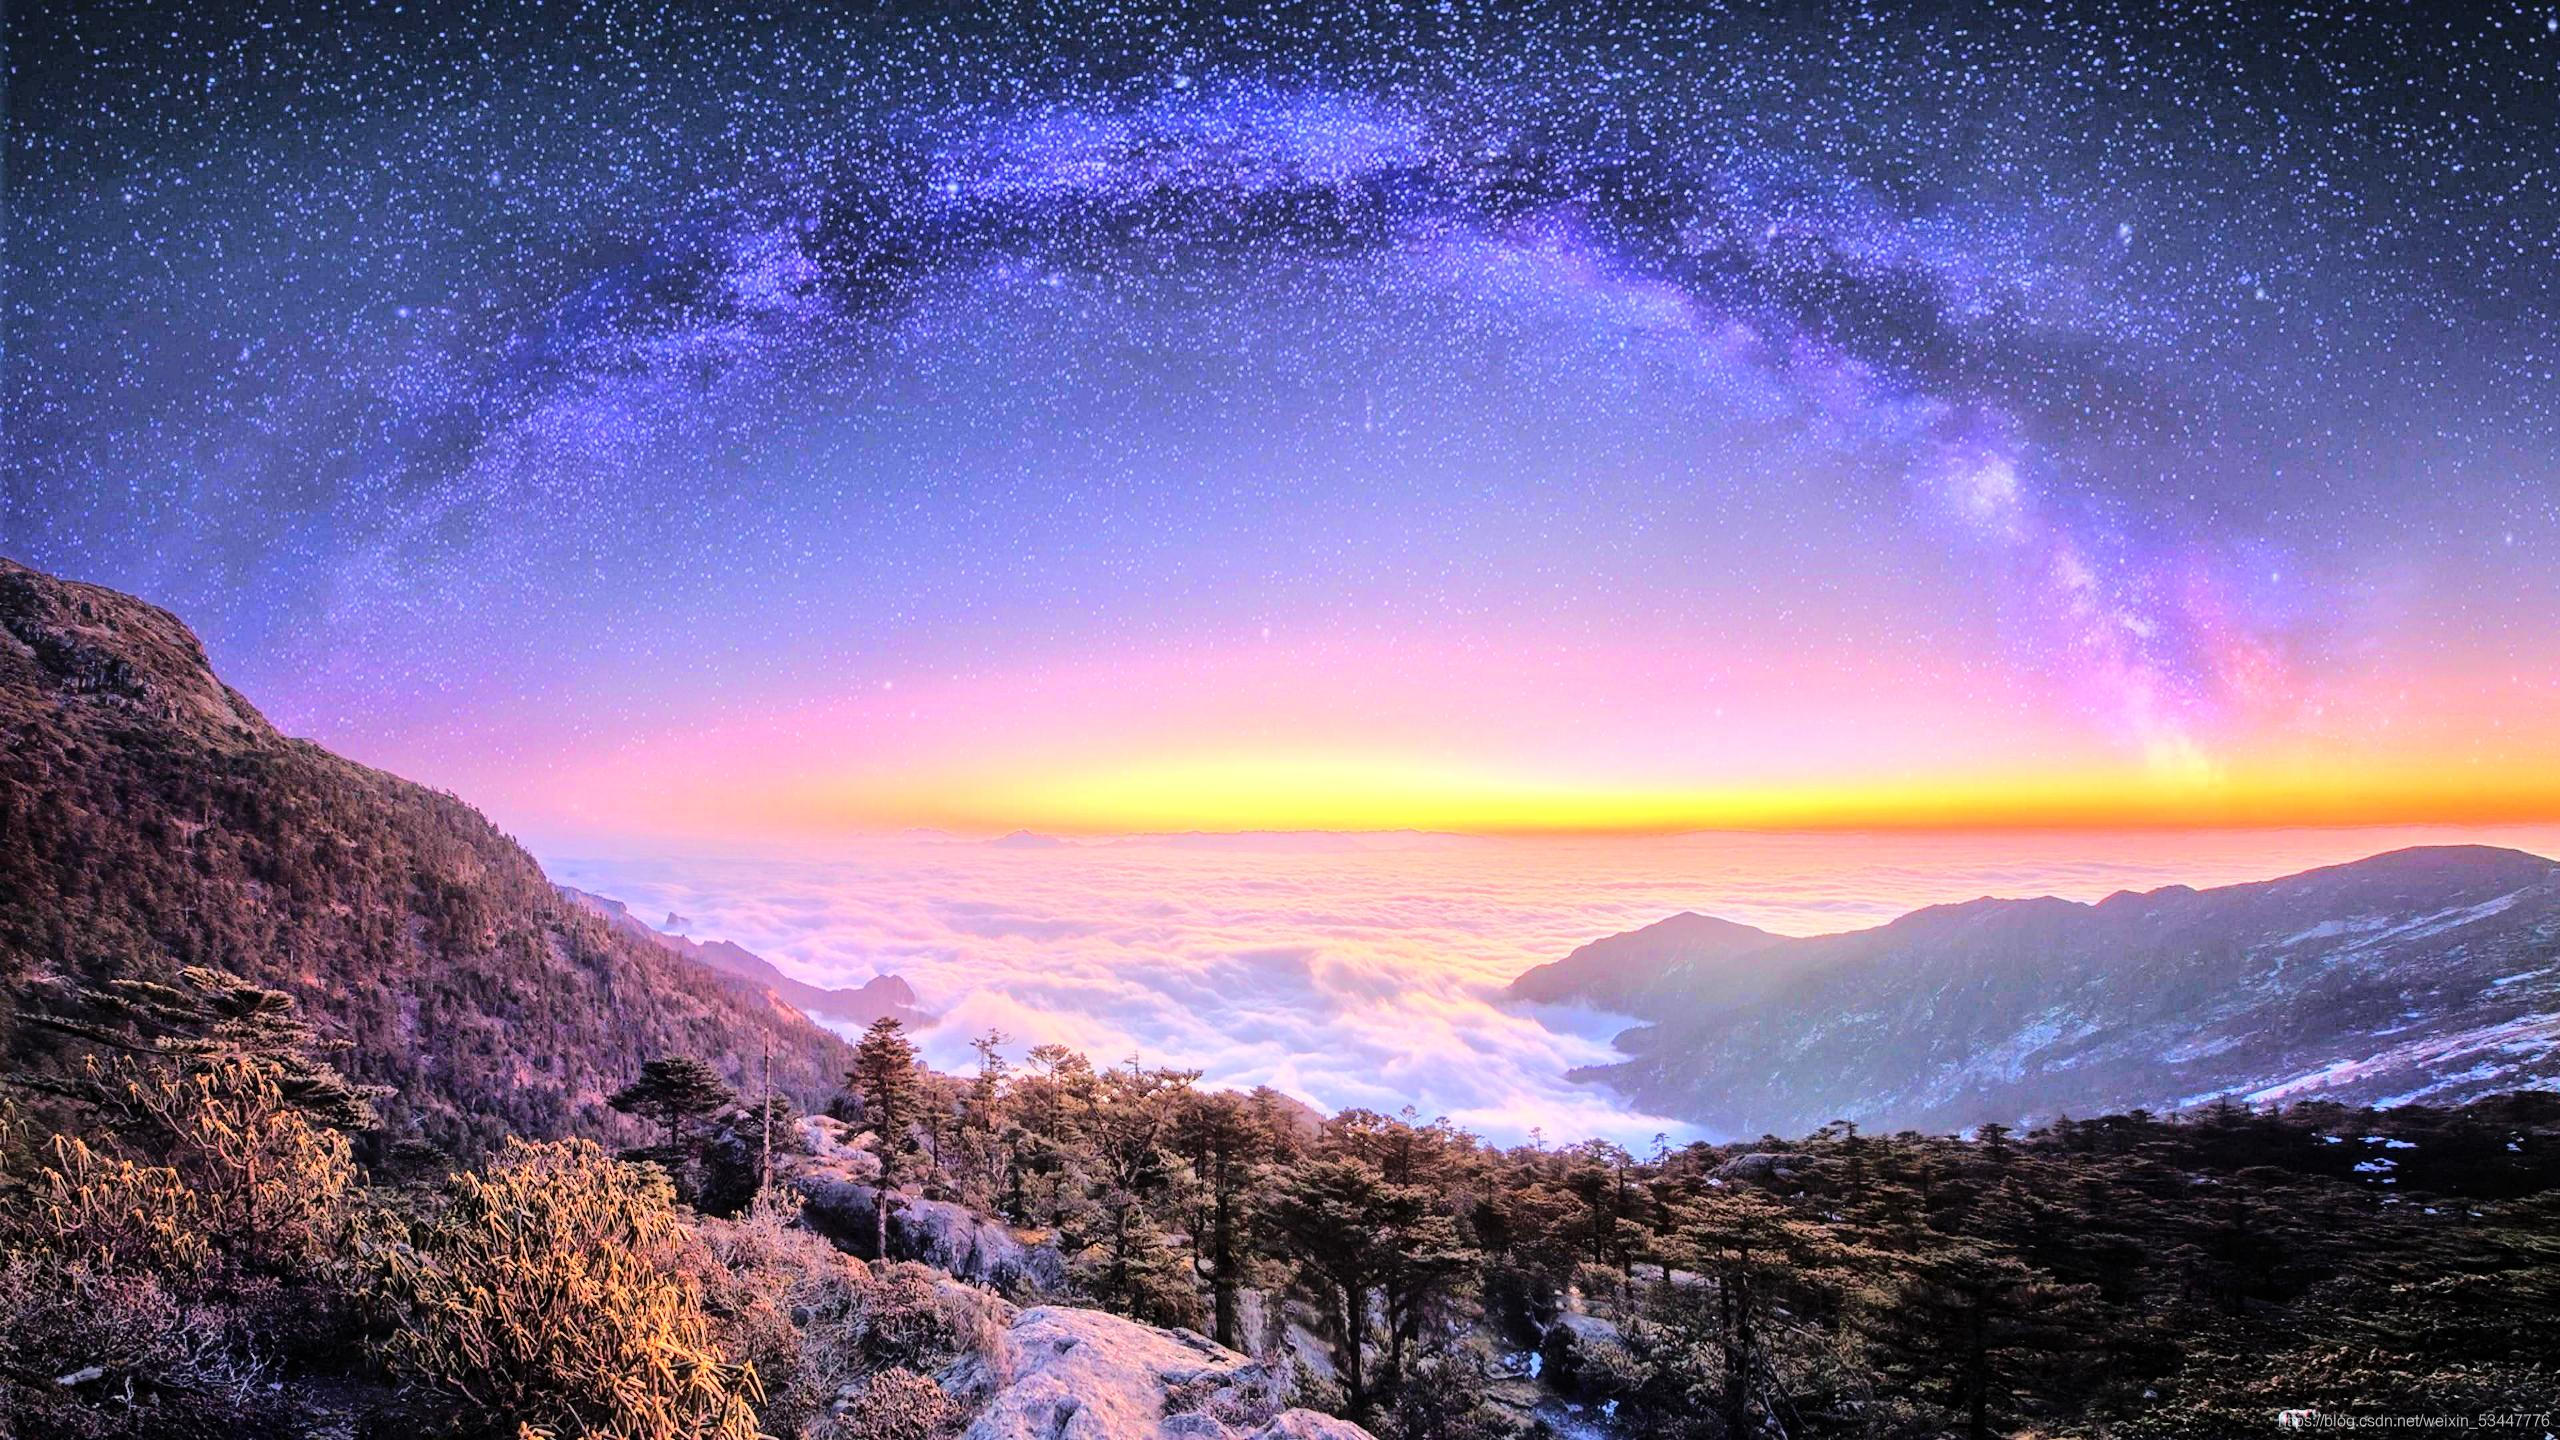

In [35]:
import requests
from PIL import Image
url="https://img-blog.csdnimg.cn/2021051521244130.jpg?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L3dlaXhpbl81MzQ0Nzc3Ng==,size_16,color_FFFFFF,t_70"
image=Image.open(requests.get(url,stream=True).raw)
image

In [39]:
predictions=detector(
      "http://images.cocodataset.org/val2017/000000039769.jpg",
        candidate_labels=["cat", "couch"],
     )
predictions

[{'score': 0.28681299090385437,
  'label': 'cat',
  'box': {'xmin': 324, 'ymin': 20, 'xmax': 640, 'ymax': 373}},
 {'score': 0.2537279427051544,
  'label': 'cat',
  'box': {'xmin': 1, 'ymin': 55, 'xmax': 315, 'ymax': 472}},
 {'score': 0.12082966417074203,
  'label': 'couch',
  'box': {'xmin': 4, 'ymin': 0, 'xmax': 642, 'ymax': 476}}]

In [37]:
predictions=detector(image,candidate_labels=['person','dog','cat','tree'])
predictions

[]

In [38]:
detector

In [ ]:
ZeroShotObjectDetectionPipeline 